<a href="https://colab.research.google.com/github/babalooski/BIOE486/blob/main/HW2_spring2025_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Training data
# The transforms.ToTensor here will convert a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
train_set = datasets.MNIST("./data", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
# Testing data
test_set = datasets.MNIST("./data", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

# Define dataloader
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

print(f"Sizes of train_dataset: {len(train_set)} and test_set: {len(test_set)}")

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 476kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.37MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.66MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Sizes of train_dataset: 60000 and test_set: 10000


In [2]:
# TASK 1 (25 pts): Re-implement the FCN (Fully Connected Network) from HW1 in PyTorch.
# For this first task, you are only responsible for building the network.
# YOu will only need to use dense (FC) layers, a softmax layer, and an activation function.
# However, make sure the network is the exact same as HW1 - INCLUDING bias terms!
#
# Use the pytorch api to determine the format of the function calls you will use.
# This can easily be found using google and the name of one of the layers.


# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden_units = 20
        self.flatten = nn.Flatten() # Flattening the images into vectors
        # Fully connected layers (including bias=True to match HW1)
        self.fc1 = nn.Linear(784, self.hidden_units, bias=True)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(self.hidden_units, 10, bias=True)
        self._softmax = nn.Softmax(dim=1)
        # Activation and Softmax

        # ----
        # Your codes here
        # ----

    def forward(self, x):
        x = self.flatten(x)
        x = self.sigmoid(self.fc1(x))
        x = self.fc2(x)
        x = self._softmax(x)
        # ----
        # Your codes here
        # ----
        return x

my_NN = SimpleNN() #Define model here
print(my_NN)

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=20, out_features=10, bias=True)
  (_softmax): Softmax(dim=1)
)


In [18]:
optimizer = optim.SGD(my_NN.parameters(), lr=0.5, momentum=0.9) # stochastic gradient descent (with momentum)
criterion = nn.CrossEntropyLoss() #Loss function

# Training loop, 10 epochs
epochs = 10
Train_accuracy = [] #save the train accuracy for each epoch
Test_accuracy = [] #save the test accuracy for each epoch
for epoch in range(epochs):
    my_NN.train()
    #Training here
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = my_NN(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)

    my_NN.eval()

    #Calculate accuracy on training dataset
    Train_correct = 0
    Train_total = 0
    for inputs, labels in train_loader:
        outputs = my_NN(inputs)
        _, predicted = torch.max(outputs.data, 1)
        Train_total += labels.size(0)
        Train_correct += (predicted == labels).sum().item()

    #Calculate accuracy on Test dataset
    Test_correct = 0
    Test_total = 0
    for inputs, labels in test_loader:
        outputs = my_NN(inputs)
        _, predicted = torch.max(outputs.data, 1)
        Test_total += labels.size(0)
        Test_correct += (predicted == labels).sum().item()

    Train_accuracy.append(Train_correct / Train_total)
    Test_accuracy.append(Test_correct / Test_total)
    print('Epoch:', epoch,'Train accuracy', Train_correct / Train_total,'Test accuracy', Test_correct/Test_total)

Epoch: 0 Train accuracy 0.9092666666666667 Test accuracy 0.9125
Epoch: 1 Train accuracy 0.9390166666666667 Test accuracy 0.9367
Epoch: 2 Train accuracy 0.9427 Test accuracy 0.9376
Epoch: 3 Train accuracy 0.9452 Test accuracy 0.9401
Epoch: 4 Train accuracy 0.95325 Test accuracy 0.9471
Epoch: 5 Train accuracy 0.9538 Test accuracy 0.9444
Epoch: 6 Train accuracy 0.9560166666666666 Test accuracy 0.9457
Epoch: 7 Train accuracy 0.95715 Test accuracy 0.9458
Epoch: 8 Train accuracy 0.9563833333333334 Test accuracy 0.948
Epoch: 9 Train accuracy 0.9594333333333334 Test accuracy 0.9502


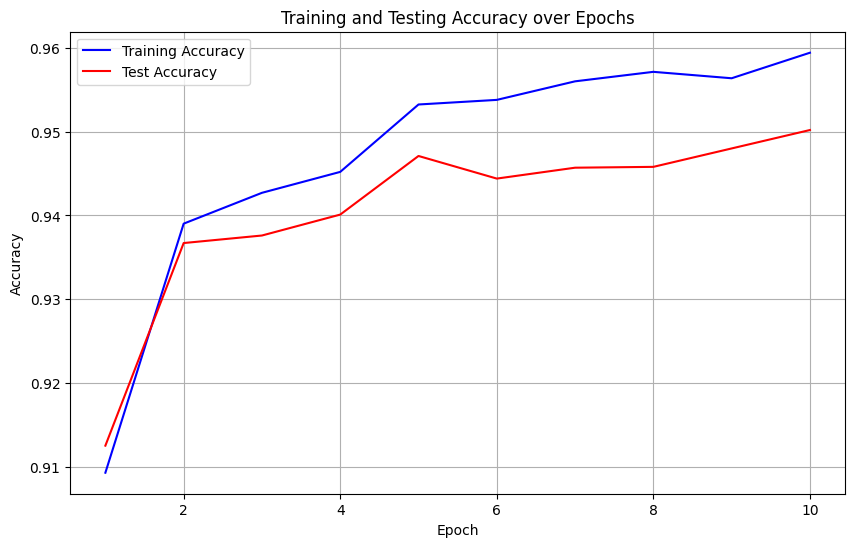

In [19]:
# Plot Train_accuracy and Test_accuracy
# ----
# Your codes here
# ----

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), Train_accuracy, 'b', label="Training Accuracy")
plt.plot(range(1, epochs+1), Test_accuracy, 'r', label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# TASK 2 (25 pts): Now it is your turn to build a Convolutional Neural Network (CNN) for classifying MNIST digits.
# Your network must have two convolutional layers with 5x5 convolution kernels.
# The first layer will have 32 filters, and the second will have 64.
# Use a bias for the conv layers and a ReLU activation function.
# Include two 2x2 pooling layers, which come after convolutional layers.
# These layers will be followed by 2 fully connected layers.
# Include a ReLU activation function on the first but not the second.
# The last layer will be a softmax layer.
# See the image below for a diagram of this information.
plt.rcParams['figure.figsize'] = [16, 8]
img = mpimg.imread('Network_Diagram.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

# You are responsible for presenting the results of your network in a concise and interpretable manner.
# If your results are not neat and concise, you may be penalized.
# One good way of including results in the notebook is saving files during your run and loading them in the notebook.
#
# You must include the following:
# 1.) Model layout, as obtained by the print(my_NN), where my_NN is an instance of a pre-defined nn.Module class.
# 2.) Train and test accuracies for each epoch, in numerical form.
#     ACCURACY for THE TRAINING data MUST BE SHOWN ABOVE 98% AFTER 10 EPOCHS TO RECEIVE FULL CREDIT.
# 3.) Loss curves in the form of a graph.
#
# You may insert cells below as desired to format your presentation.


FileNotFoundError: [Errno 2] No such file or directory: 'Network_Diagram.PNG'

In [10]:
# Define the Convolutional Neural Network
class myCNN(nn.Module):
    def __init__(self):
        super(myCNN, self).__init__()
        # ----
        # Your codes here: defining the layers
        # ----

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5,stride=1, padding=2, bias=True)
        self.relu = nn.ReLU();
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # After conv1, the image dimensions change from 28x28 to 24x24 (if no padding)
        # Then a 2x2 pooling reduces it to 12x12.
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5,stride=1, padding=2, bias=True)
        # After conv2, 12x12 becomes 8x8, and a 2x2 pooling reduces it to 4x4.
        self.relu = nn.ReLU();

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully Connected Layers
        # The flattened feature map after conv layers is 64 channels x 4 x 4 = 1024.
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3136, 1024, bias=True)  # First FC layer with ReLU activation
        self.relu = nn.ReLU()

        self.fc2 = nn.Linear(1024, 10, bias=True)      # Second FC layer (output layer)

        # Activation Function
        self.softmax = nn.Softmax(dim=1)              # softmax layer

    def forward(self, x):
        # ----
        # Your codes here: implement forward pass using the layers defined above
        # ----

        x = self.relu(self.conv1(x))
        x = self.pool(x)
        # Second conv block: Conv2 -> ReLU -> 2x2 MaxPool, output size: [batch, 64, 7, 7]
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        # Flatten the feature maps: [batch, 3136]
        x = x.view(x.size(0), -1)
        x = self.flatten(x)
        # Fully connected layers
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)                        # Softmax layer for classification

my_CNN = myCNN() #Define model here
print(my_CNN)

myCNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [11]:
optimizer = optim.SGD(my_CNN.parameters(), lr=0.01, momentum=0.9) # stochastic gradient descent (with momentum)
criterion = nn.CrossEntropyLoss() #Loss function

# Training loop, 10 epochs
epochs = 10
Train_accuracy = [] #save the train accuracy for each epoch
Test_accuracy = [] #save the test accuracy for each epoch
Loss_list = []
for epoch in range(epochs):
    my_CNN.train()
    #Training here
    for inputs, labels in train_loader:
        # ----
        # Your codes here
        # ----

        optimizer.zero_grad()
        outputs = my_CNN(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        Loss_list.append(loss.detach().numpy())
    my_CNN.eval()

    #Calculate accuracy on training dataset
    Train_correct = 0
    Train_total = 0
    for inputs, labels in train_loader:
        outputs = my_CNN(inputs)
        _, predicted = torch.max(outputs.data, 1)
        Train_total += labels.size(0)
        Train_correct += (predicted == labels).sum().item()

    #Calculate accuracy on Test dataset
    Test_correct = 0
    Test_total = 0
    for inputs, labels in test_loader:
        outputs = my_CNN(inputs)
        _, predicted = torch.max(outputs.data, 1)
        Test_total += labels.size(0)
        Test_correct += (predicted == labels).sum().item()

    Train_accuracy.append(Train_correct / Train_total)
    Test_accuracy.append(Test_correct / Test_total)
    print('Epoch:', epoch,'Train accuracy', Train_correct / Train_total,'Test accuracy', Test_correct/Test_total)

Epoch: 0 Train accuracy 0.9326333333333333 Test accuracy 0.9395
Epoch: 1 Train accuracy 0.9641 Test accuracy 0.9666
Epoch: 2 Train accuracy 0.9736666666666667 Test accuracy 0.9756
Epoch: 3 Train accuracy 0.97755 Test accuracy 0.9786
Epoch: 4 Train accuracy 0.9827166666666667 Test accuracy 0.9823
Epoch: 5 Train accuracy 0.9841 Test accuracy 0.9839
Epoch: 6 Train accuracy 0.9838833333333333 Test accuracy 0.9834
Epoch: 7 Train accuracy 0.9867666666666667 Test accuracy 0.9819
Epoch: 8 Train accuracy 0.9864166666666667 Test accuracy 0.9854
Epoch: 9 Train accuracy 0.99075 Test accuracy 0.9884


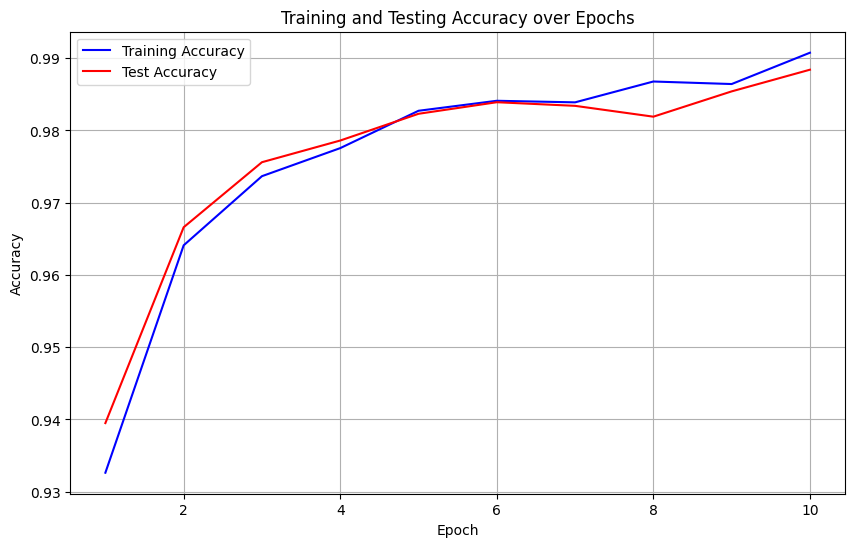

In [14]:
# ----
# Plotting training and testing accuracy
# ----

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), Train_accuracy, 'b', label="Training Accuracy")
plt.plot(range(1, epochs+1), Test_accuracy, 'r', label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.show()

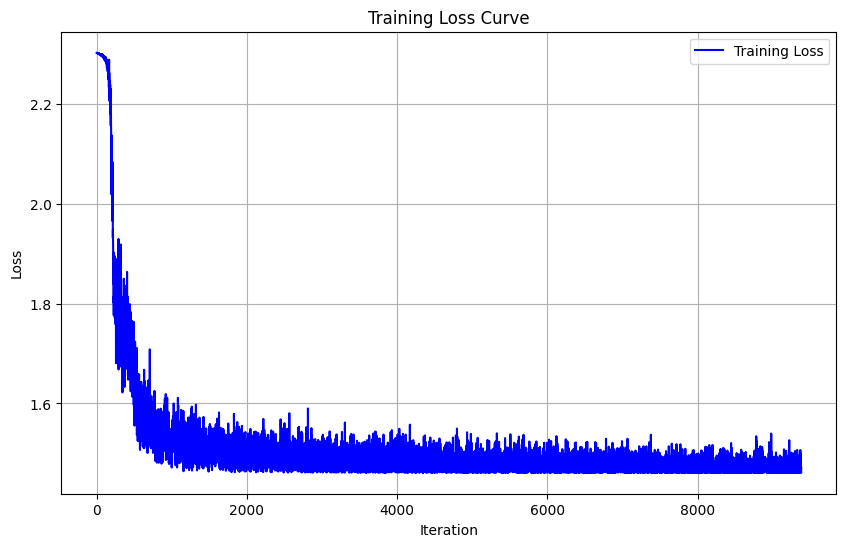

In [12]:
# ----
# Plotting loss curve against iteration
# ----


plt.figure(figsize=(10,6))
plt.plot(Loss_list, 'b-', label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# TASK 3 (10 pts): Break down the computations for the number of trainable parameters in each layer of the conv net.
# Include variable labels and the calculations.
# For example, a dense layer line might look like the below:
# Dense 2: 20 inputs * 10 outputs + 10 bias = 210 parameters
# You can use the model output from the conv net to double check your solutions.
# Place your neatly formatted solution below.
# Pictures of handwritten calculations will NOT be considered.

# ----
# You can put your calculation process and final numbers as texts in this block
# ----

# Conv1

# Kernel: 5x5
# Output: 32 Layers
# Input: 1 channel

# (1+5x5+1)*32 = (25+1)*32 = 832

832

# Conv2

# Kernel: 5x5
# Input: 32 channels
# Output: 64 filters

# (32x5x5+1) x 64 = 801 x 64 = 51264

51264

# Flatten Layer

64x7x7 = 3136

#fc1

# Input: 3136
# Output: 256

# (3136 + 1) x 256 = 803,072

803072

#fc2

# Input: 256
# Output: 10

#(256+1)x10

2570



In [7]:
# TASK 4 (20 pts): Add a dropout layer to the network just before the second fully connected layer.
# Try different dropout probabilities, at minimum including the following values:
# 0.3, 0.5, 0.7
# Comment on how the network's performance changes.

# Model with drop out layer:
class myCNN_dropout(nn.Module):
    def __init__(self):
        super(myCNN_dropout, self).__init__()
        # ----
        # Your codes here
        # ----

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2, bias=True)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # reduces 28x28 -> 14x14

        # Convolutional Block 2: Conv + ReLU + 2x2 MaxPool
        # With padding=2, output remains 14x14 then pooling reduces to 7x7.
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2, bias=True)

        # Flatten layer to convert feature maps into a vector.
        # After two conv+pool blocks, the feature map is 64 channels with 7x7 spatial dimensions (64*7*7 = 3136).
        self.flatten = nn.Flatten()

        # Fully connected layers:
        self.fc1 = nn.Linear(3136, 1024, bias=True)  # first dense layer with ReLU activation
        self.dropout = nn.Dropout(p=.3)     # dropout layer between the two FC layers
        self.fc2 = nn.Linear(1024, 10, bias=True)       # second dense layer producing 10 outputs

        # Activations:
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)              # softmax layer

    def forward(self, x):
        # ----
        # Your codes here
        # ----

        x = self.relu(self.conv1(x))  # [batch, 32, 28, 28] with padding, then:
        x = self.pool(x)              # [batch, 32, 14, 14]

        # Second conv block
        x = self.relu(self.conv2(x))  # [batch, 64, 14, 14]
        x = self.pool(x)              # [batch, 64, 7, 7]

        # Flatten
        x = self.flatten(x)           # [batch, 3136]

        # Fully connected layers
        x = self.relu(self.fc1(x))    # [batch, 256]
        x = self.dropout(x)
        x = self.fc2(x)                               # Fully connected layer
        return self.softmax(x)                        # Softmax layer for classification

my_CNN = myCNN_dropout()
print(my_CNN)


myCNN_dropout(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


Epoch: 0 Train accuracy 0.955 Test accuracy 0.9577
Epoch: 1 Train accuracy 0.9715333333333334 Test accuracy 0.9739
Epoch: 2 Train accuracy 0.9765333333333334 Test accuracy 0.9786
Epoch: 3 Train accuracy 0.9804333333333334 Test accuracy 0.9813
Epoch: 4 Train accuracy 0.9851 Test accuracy 0.9855
Epoch: 5 Train accuracy 0.98755 Test accuracy 0.9857
Epoch: 6 Train accuracy 0.9872333333333333 Test accuracy 0.987
Epoch: 7 Train accuracy 0.98915 Test accuracy 0.9883
Epoch: 8 Train accuracy 0.99015 Test accuracy 0.9888
Epoch: 9 Train accuracy 0.9905833333333334 Test accuracy 0.9889


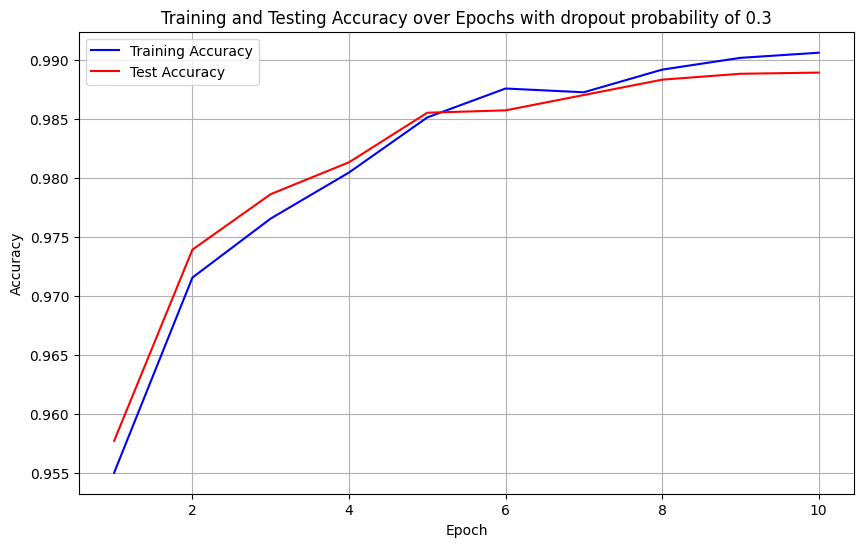

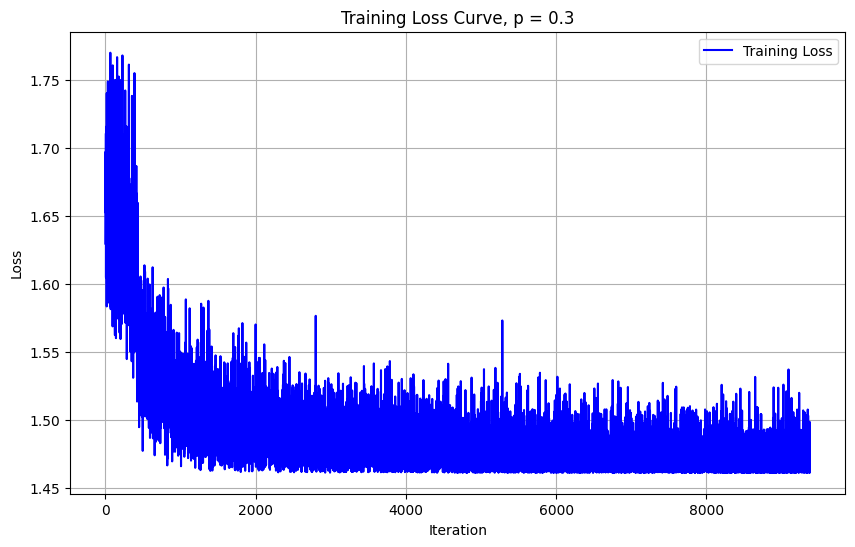

In [10]:
optimizer = optim.SGD(my_CNN.parameters(), lr=0.01, momentum=0.9) # stochastic gradient descent (with momentum)
criterion = nn.CrossEntropyLoss() #Loss function

# Training loop, 10 epochs
epochs = 10
Train_accuracy = [] #save the train accuracy for each epoch
Test_accuracy = [] #save the test accuracy for each epoch
Loss_list = []
for epoch in range(epochs):
    my_CNN.train()
    #Training here
    for inputs, labels in train_loader:
        # ----
        # Your codes here
        # ----

        optimizer.zero_grad()
        outputs = my_CNN(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        Loss_list.append(loss.detach().numpy())
    my_CNN.eval()

    #Calculate accuracy on training dataset
    Train_correct = 0
    Train_total = 0
    for inputs, labels in train_loader:
        outputs = my_CNN(inputs)
        _, predicted = torch.max(outputs.data, 1)
        Train_total += labels.size(0)
        Train_correct += (predicted == labels).sum().item()

    #Calculate accuracy on Test dataset
    Test_correct = 0
    Test_total = 0
    for inputs, labels in test_loader:
        outputs = my_CNN(inputs)
        _, predicted = torch.max(outputs.data, 1)
        Test_total += labels.size(0)
        Test_correct += (predicted == labels).sum().item()

    Train_accuracy.append(Train_correct / Train_total)
    Test_accuracy.append(Test_correct / Test_total)
    print('Epoch:', epoch,'Train accuracy', Train_correct / Train_total,'Test accuracy', Test_correct/Test_total)

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), Train_accuracy, 'b', label="Training Accuracy")
plt.plot(range(1, epochs+1), Test_accuracy, 'r', label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy over Epochs with dropout probability of 0.3")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(Loss_list, 'b-', label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curve, p = 0.3")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# TASK 4 (20 pts): Add a dropout layer to the network just before the second fully connected layer.
# Try different dropout probabilities, at minimum including the following values:
# 0.3, 0.5, 0.7
# Comment on how the network's performance changes.

# Model with drop out layer:
class myCNN_dropout(nn.Module):
    def __init__(self):
        super(myCNN_dropout, self).__init__()
        # ----
        # Your codes here
        # ----

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2, bias=True)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # reduces 28x28 -> 14x14

        # Convolutional Block 2: Conv + ReLU + 2x2 MaxPool
        # With padding=2, output remains 14x14 then pooling reduces to 7x7.
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2, bias=True)

        # Flatten layer to convert feature maps into a vector.
        # After two conv+pool blocks, the feature map is 64 channels with 7x7 spatial dimensions (64*7*7 = 3136).
        self.flatten = nn.Flatten()

        # Fully connected layers:
        self.fc1 = nn.Linear(3136, 1024, bias=True)  # first dense layer with ReLU activation
        self.dropout = nn.Dropout(p=.5)     # dropout layer between the two FC layers
        self.fc2 = nn.Linear(1024, 10, bias=True)       # second dense layer producing 10 outputs

        # Activations:
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)              # softmax layer

    def forward(self, x):
        # ----
        # Your codes here
        # ----

        x = self.relu(self.conv1(x))  # [batch, 32, 28, 28] with padding, then:
        x = self.pool(x)              # [batch, 32, 14, 14]

        # Second conv block
        x = self.relu(self.conv2(x))  # [batch, 64, 14, 14]
        x = self.pool(x)              # [batch, 64, 7, 7]

        # Flatten
        x = self.flatten(x)           # [batch, 3136]

        # Fully connected layers
        x = self.relu(self.fc1(x))    # [batch, 256]
        x = self.dropout(x)
        x = self.fc2(x)                               # Fully connected layer
        return self.softmax(x)                        # Softmax layer for classification

my_CNN = myCNN_dropout()
print(my_CNN)

myCNN_dropout(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


Epoch: 0 Train accuracy 0.8702166666666666 Test accuracy 0.8716
Epoch: 1 Train accuracy 0.9658 Test accuracy 0.9684
Epoch: 2 Train accuracy 0.9749333333333333 Test accuracy 0.9768
Epoch: 3 Train accuracy 0.9793 Test accuracy 0.9803
Epoch: 4 Train accuracy 0.9802166666666666 Test accuracy 0.9811
Epoch: 5 Train accuracy 0.9848166666666667 Test accuracy 0.9839
Epoch: 6 Train accuracy 0.9857666666666667 Test accuracy 0.983
Epoch: 7 Train accuracy 0.9879 Test accuracy 0.9855
Epoch: 8 Train accuracy 0.98845 Test accuracy 0.9883
Epoch: 9 Train accuracy 0.9890166666666667 Test accuracy 0.9878


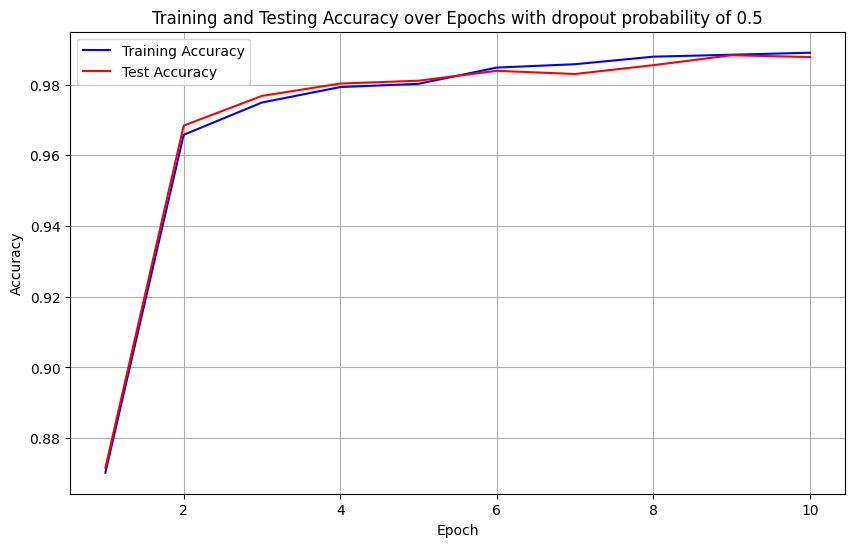

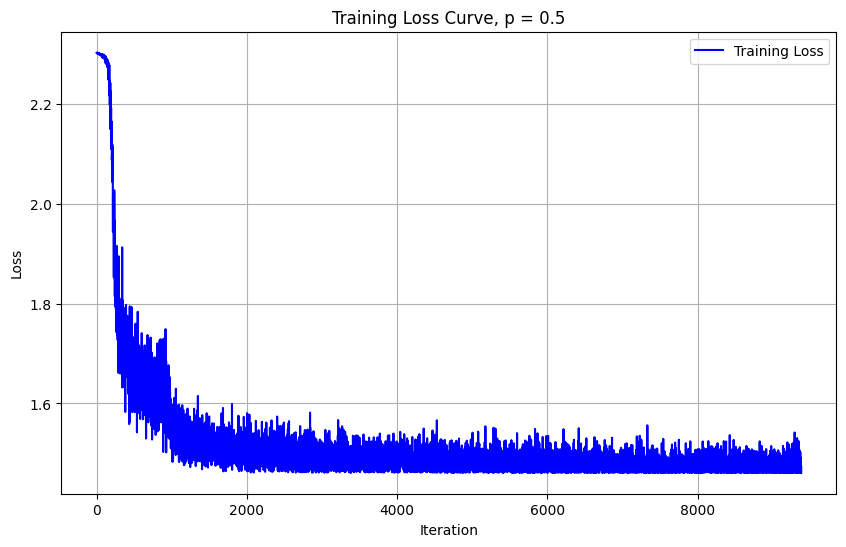

In [12]:
optimizer = optim.SGD(my_CNN.parameters(), lr=0.01, momentum=0.9) # stochastic gradient descent (with momentum)
criterion = nn.CrossEntropyLoss() #Loss function

# Training loop, 10 epochs
epochs = 10
Train_accuracy = [] #save the train accuracy for each epoch
Test_accuracy = [] #save the test accuracy for each epoch
Loss_list = []
for epoch in range(epochs):
    my_CNN.train()
    #Training here
    for inputs, labels in train_loader:
        # ----
        # Your codes here
        # ----

        optimizer.zero_grad()
        outputs = my_CNN(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        Loss_list.append(loss.detach().numpy())
    my_CNN.eval()

    #Calculate accuracy on training dataset
    Train_correct = 0
    Train_total = 0
    for inputs, labels in train_loader:
        outputs = my_CNN(inputs)
        _, predicted = torch.max(outputs.data, 1)
        Train_total += labels.size(0)
        Train_correct += (predicted == labels).sum().item()

    #Calculate accuracy on Test dataset
    Test_correct = 0
    Test_total = 0
    for inputs, labels in test_loader:
        outputs = my_CNN(inputs)
        _, predicted = torch.max(outputs.data, 1)
        Test_total += labels.size(0)
        Test_correct += (predicted == labels).sum().item()

    Train_accuracy.append(Train_correct / Train_total)
    Test_accuracy.append(Test_correct / Test_total)
    print('Epoch:', epoch,'Train accuracy', Train_correct / Train_total,'Test accuracy', Test_correct/Test_total)

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), Train_accuracy, 'b', label="Training Accuracy")
plt.plot(range(1, epochs+1), Test_accuracy, 'r', label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy over Epochs with dropout probability of 0.5")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(Loss_list, 'b-', label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curve, p = 0.5")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# TASK 4 (20 pts): Add a dropout layer to the network just before the second fully connected layer.
# Try different dropout probabilities, at minimum including the following values:
# 0.3, 0.5, 0.7
# Comment on how the network's performance changes.

# Model with drop out layer:
class myCNN_dropout(nn.Module):
    def __init__(self):
        super(myCNN_dropout, self).__init__()
        # ----
        # Your codes here
        # ----

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2, bias=True)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # reduces 28x28 -> 14x14

        # Convolutional Block 2: Conv + ReLU + 2x2 MaxPool
        # With padding=2, output remains 14x14 then pooling reduces to 7x7.
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2, bias=True)

        # Flatten layer to convert feature maps into a vector.
        # After two conv+pool blocks, the feature map is 64 channels with 7x7 spatial dimensions (64*7*7 = 3136).
        self.flatten = nn.Flatten()

        # Fully connected layers:
        self.fc1 = nn.Linear(3136, 1024, bias=True)  # first dense layer with ReLU activation
        self.dropout = nn.Dropout(p=.7)     # dropout layer between the two FC layers
        self.fc2 = nn.Linear(1024, 10, bias=True)       # second dense layer producing 10 outputs

        # Activations:
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)              # softmax layer

    def forward(self, x):
        # ----
        # Your codes here
        # ----

        x = self.relu(self.conv1(x))  # [batch, 32, 28, 28] with padding, then:
        x = self.pool(x)              # [batch, 32, 14, 14]

        # Second conv block
        x = self.relu(self.conv2(x))  # [batch, 64, 14, 14]
        x = self.pool(x)              # [batch, 64, 7, 7]

        # Flatten
        x = self.flatten(x)           # [batch, 3136]

        # Fully connected layers
        x = self.relu(self.fc1(x))    # [batch, 256]
        x = self.dropout(x)
        x = self.fc2(x)                               # Fully connected layer
        return self.softmax(x)                        # Softmax layer for classification

my_CNN = myCNN_dropout()
print(my_CNN)

myCNN_dropout(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (dropout): Dropout(p=0.7, inplace=False)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


Epoch: 0 Train accuracy 0.9402666666666667 Test accuracy 0.9432
Epoch: 1 Train accuracy 0.9665333333333334 Test accuracy 0.9669
Epoch: 2 Train accuracy 0.9759166666666667 Test accuracy 0.9763
Epoch: 3 Train accuracy 0.9783 Test accuracy 0.9781
Epoch: 4 Train accuracy 0.9824 Test accuracy 0.983
Epoch: 5 Train accuracy 0.98315 Test accuracy 0.9828
Epoch: 6 Train accuracy 0.9828666666666667 Test accuracy 0.9855
Epoch: 7 Train accuracy 0.9864 Test accuracy 0.986
Epoch: 8 Train accuracy 0.9879833333333333 Test accuracy 0.987
Epoch: 9 Train accuracy 0.9873333333333333 Test accuracy 0.9873


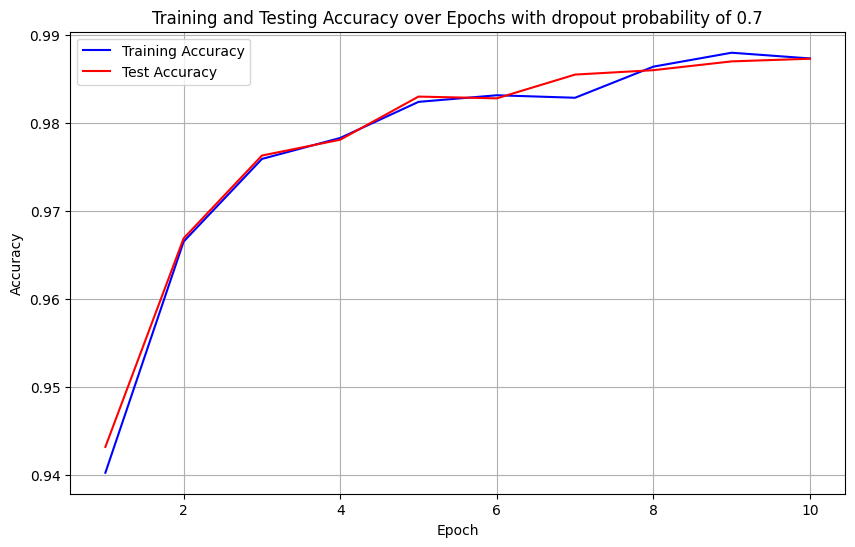

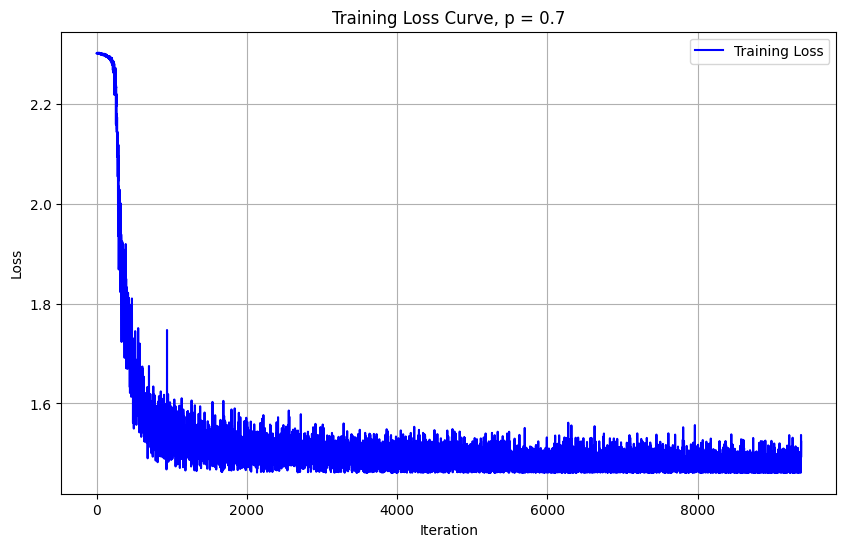

In [14]:
optimizer = optim.SGD(my_CNN.parameters(), lr=0.01, momentum=0.9) # stochastic gradient descent (with momentum)
criterion = nn.CrossEntropyLoss() #Loss function

# Training loop, 10 epochs
epochs = 10
Train_accuracy = [] #save the train accuracy for each epoch
Test_accuracy = [] #save the test accuracy for each epoch
Loss_list = []
for epoch in range(epochs):
    my_CNN.train()
    #Training here
    for inputs, labels in train_loader:
        # ----
        # Your codes here
        # ----

        optimizer.zero_grad()
        outputs = my_CNN(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        Loss_list.append(loss.detach().numpy())
    my_CNN.eval()

    #Calculate accuracy on training dataset
    Train_correct = 0
    Train_total = 0
    for inputs, labels in train_loader:
        outputs = my_CNN(inputs)
        _, predicted = torch.max(outputs.data, 1)
        Train_total += labels.size(0)
        Train_correct += (predicted == labels).sum().item()

    #Calculate accuracy on Test dataset
    Test_correct = 0
    Test_total = 0
    for inputs, labels in test_loader:
        outputs = my_CNN(inputs)
        _, predicted = torch.max(outputs.data, 1)
        Test_total += labels.size(0)
        Test_correct += (predicted == labels).sum().item()

    Train_accuracy.append(Train_correct / Train_total)
    Test_accuracy.append(Test_correct / Test_total)
    print('Epoch:', epoch,'Train accuracy', Train_correct / Train_total,'Test accuracy', Test_correct/Test_total)

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), Train_accuracy, 'b', label="Training Accuracy")
plt.plot(range(1, epochs+1), Test_accuracy, 'r', label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy over Epochs with dropout probability of 0.7")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(Loss_list, 'b-', label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curve, p = 0.7")
plt.legend()
plt.grid(True)
plt.show()

The training data  looks very similar between all the possible dropout probabilities, although it appears to train faster at .5. This is just an oibservation made upon one training set so in order to confirm scientifically you would need to test other data sets and check to see the difference in training times between the dropout frequencies.

In [ ]:
# TASK 5 (20 pts): GRADUATE STUDENTS ONLY
# Vary the number of filters for the convolutional layers.
# Choose at least 5 values for each layer, and space them stuch that you can observe a pattern in the performance.
# Present your solution as a 5x5 surface plot that contains the accuracy of all of the combinations of filter values.
# Ensure that your chosen values are clearly visible on the graph axes and also include them in your explanation.
# Also experiment with different filter sizes and evaluate the effects on performance (which layer(s) to change is up to you).